# 京东订单销售数据分析

## 项目概述

项目数据来源2020年5月25号京东大家电销售-冰箱订单数据<p>
按照10%随机抽取的比例抽取，包含约70万条相关数据

- 数据字段说明

|字段|说明|
|---|---|
|user_log_acct|用户账号|
|parent_sale_ord_id|父订单号|
|sale_ord_id|订单号|
|sale_ord_tm|订单时间|
|sale_ord_dt|订单日期|
|item_sku_id|商品sku|
|item_name|商品名称|
|brandname|品牌名称|
|sale_qtty|商品数量|
|item_first_cate_name|一级品类名称|
|item_second_cate_name|二级品类名称|
|item_third_cate_name|三级品类名称|
|before_prefr_unit_price|优惠前单价|
|after_prefr_unit_price|优惠后单价|
|user_actual_pay_amount|实际支付价格|
|sale_ord_valid_flag|订单有效标志|
|cancel_flag|订单取消标志|
|check_account_tm|支付时间|
|total_offer_amount|总优惠金额|
|self_ord_flag|自营标志|
|user_site_city_id|用户所在城市编号|
|user_site_province_id|用户所在省份编号|
|user_lv_cd|用户会员等级|

## 数据预处理

### 数据概览

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
jd_data = pd.read_csv("./datasets/data.csv", sep="\t", encoding="utf-8", dtype=str)
jd_data.head() # 查看前5行数据

,user_log_acct,parent_sale_ord_id,sale_ord_id,sale_ord_tm,sale_ord_dt,item_sku_id,item_name,brandname,sale_qtty,item_first_cate_name,...,after_prefr_unit_price,user_actual_pay_amount,sale_ord_valid_flag,cancel_flag,check_account_tm,total_offer_amount,self_ord_flag,user_site_city_id,user_site_province_id,user_lv_cd
0,linfbi007,116828823929,116828823929,2020-05-25 18:09:39.0,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,1099.0,976.0,1,0,2020-05-25 18:10:23.0,400.0,1,757,10,61
1,13601089905_p,116769479986,121562216719,2020-05-25 00:04:15.0,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,1099.0,978.99,1,0,2020-05-25 00:05:59.0,400.0,1,0,0,62
2,jd_UbSjKwFGOfbv,116815391384,116809219025,2020-05-25 13:47:33.0,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,1099.0,979.0,1,0,2020-05-25 14:08:28.0,400.0,1,NaN,NaN,50
3,yangwangjun1300,116814673181,116814673181,2020-05-25 14:34:25.0,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,1099.0,979.0,1,0,2020-05-25 14:34:47.0,400.0,1,1655,19,61
4,jd_77dbadc203044,116811074034,116811074034,2020-05-25 14:47:42.0,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,1099.0,0.0,1,0,NaN,400.0,1,NaN,NaN,56


In [3]:
jd_data.info() # 查看数据信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76631 entries, 0 to 76630
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   user_log_acct            76631 non-null  object
 1   parent_sale_ord_id       76631 non-null  object
 2   sale_ord_id              76631 non-null  object
 3   sale_ord_tm              76631 non-null  object
 4   sale_ord_dt              76631 non-null  object
 5   item_sku_id              76631 non-null  object
 6   item_name                76631 non-null  object
 7   brandname                76631 non-null  object
 8   sale_qtty                76631 non-null  object
 9   item_first_cate_name     76631 non-null  object
 10  item_second_cate_name    76631 non-null  object
 11  item_third_cate_name     76631 non-null  object
 12  before_prefr_unit_price  76631 non-null  object
 13  after_prefr_unit_price   76631 non-null  object
 14  user_actual_pay_amount   76631 non-nul

In [4]:
# 数据类型转换
jd_data['sale_qtty'] = jd_data['sale_qtty'].astype(int) # 销售数量
jd_data['sale_ord_valid_flag'] = jd_data['sale_ord_valid_flag'].astype(int) # 有效订单标识
jd_data['cancel_flag'] = jd_data['cancel_flag'].astype(int) # 取消标识
jd_data['self_ord_flag'] = jd_data['self_ord_flag'].astype(int) # 自营标识

jd_data['before_prefr_unit_price'] = jd_data['before_prefr_unit_price'].astype(float) # 优惠前单价
jd_data['after_prefr_unit_price'] = jd_data['after_prefr_unit_price'].astype(float) # 优惠后单价
jd_data['user_actual_pay_amount'] = jd_data['user_actual_pay_amount'].astype(float) # 用户实付金额
jd_data['total_offer_amount'] = jd_data['total_offer_amount'].astype(float) # 优惠总金额

jd_data['sale_ord_dt'] = pd.to_datetime(jd_data['sale_ord_dt']) # 销售日期
jd_data['sale_ord_tm'] = pd.to_datetime(jd_data['sale_ord_tm']) # 销售时间
jd_data['check_account_tm'] = pd.to_datetime(jd_data['check_account_tm']) # 对账时间

In [5]:
jd_data.info() # 查看数据信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76631 entries, 0 to 76630
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   user_log_acct            76631 non-null  object        
 1   parent_sale_ord_id       76631 non-null  object        
 2   sale_ord_id              76631 non-null  object        
 3   sale_ord_tm              76631 non-null  datetime64[ns]
 4   sale_ord_dt              76631 non-null  datetime64[ns]
 5   item_sku_id              76631 non-null  object        
 6   item_name                76631 non-null  object        
 7   brandname                76631 non-null  object        
 8   sale_qtty                76631 non-null  int32         
 9   item_first_cate_name     76631 non-null  object        
 10  item_second_cate_name    76631 non-null  object        
 11  item_third_cate_name     76631 non-null  object        
 12  before_prefr_unit_price  76631 n

In [6]:
jd_data.describe() # 查看数据描述性统计信息

,sale_qtty,before_prefr_unit_price,after_prefr_unit_price,user_actual_pay_amount,sale_ord_valid_flag,cancel_flag,total_offer_amount,self_ord_flag
count,76631.000000,76631.000000,76631.000000,76631.000000,76631.000000,76631.000000,76631.000000,76631.000000
mean,1.094779,1786.853490,1548.639734,687.937988,0.541713,0.274001,261.022177,0.565972
std,1.168436,1832.216116,1698.182417,1314.490467,0.498260,0.446013,571.315200,0.495632
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,598.000000,378.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1199.000000,999.000000,0.000000,1.000000,0.000000,100.000000,1.000000
75%,1.000000,2699.000000,2299.000000,899.000000,1.000000,1.000000,300.000000,1.000000
max,80.000000,21999.000000,21999.000000,87920.000000,1.000000,1.000000,34200.000000,1.000000


### 缺失值与异常值处理

In [7]:
jd_data.isnull().sum().sort_values(ascending=False) # 查看缺失值

user_site_city_id          38190
user_site_province_id      38033
check_account_tm           23271
user_log_acct                  0
before_prefr_unit_price        0
self_ord_flag                  0
total_offer_amount             0
cancel_flag                    0
sale_ord_valid_flag            0
user_actual_pay_amount         0
after_prefr_unit_price         0
item_third_cate_name           0
parent_sale_ord_id             0
item_second_cate_name          0
item_first_cate_name           0
sale_qtty                      0
brandname                      0
item_name                      0
item_sku_id                    0
sale_ord_dt                    0
sale_ord_tm                    0
sale_ord_id                    0
user_lv_cd                     0
dtype: int64

通过缺失值分析，我们可以发现用户的城市、省份以及支付时间的字段存在缺失值。

- 说明：<p>
    优惠前冰箱的最低价格为288元，比288元价格更低的通过仔细观察发现，这一部分订单是属于类似冰箱配件或者补运费的数据，不能真实代表冰箱数据

In [8]:
# 删除优惠前价格小于288元的数据
jd_data = jd_data[jd_data['before_prefr_unit_price'] >= 288]
# 订单编号具有唯一性，删除重复值
jd_data.drop_duplicates(subset=['sale_ord_id'], keep='first', inplace=True)
# 填充城市和省份的缺失值
jd_data['user_site_city_id'].fillna(-1, inplace=True)
jd_data['user_site_province_id'].fillna(-1, inplace=True)
# 删除重复的列
jd_data = jd_data.T.drop_duplicates().T

## 数据分析

### 订单信息初步可视化分析

订单比例分析

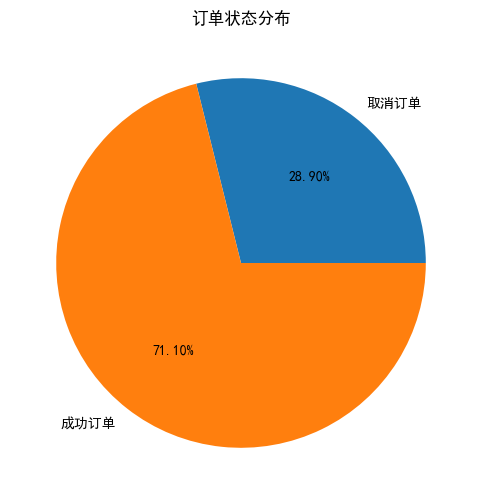

In [9]:
order_cancel = jd_data[jd_data['cancel_flag']==1]['sale_ord_id'].count() # 取消订单数量
order_success = jd_data[jd_data['cancel_flag']==0]['sale_ord_id'].count() # 成功订单数量

# 绘制饼图
plt.rcParams['font.sans-serif'] = ['SimHei'] # 设置中文显示
plt.figure(figsize=(6, 6))
plt.pie([order_cancel, order_success], labels=['取消订单', '成功订单'], autopct='%.2f%%')
plt.title('订单状态分布')
plt.show()

订单价格分布

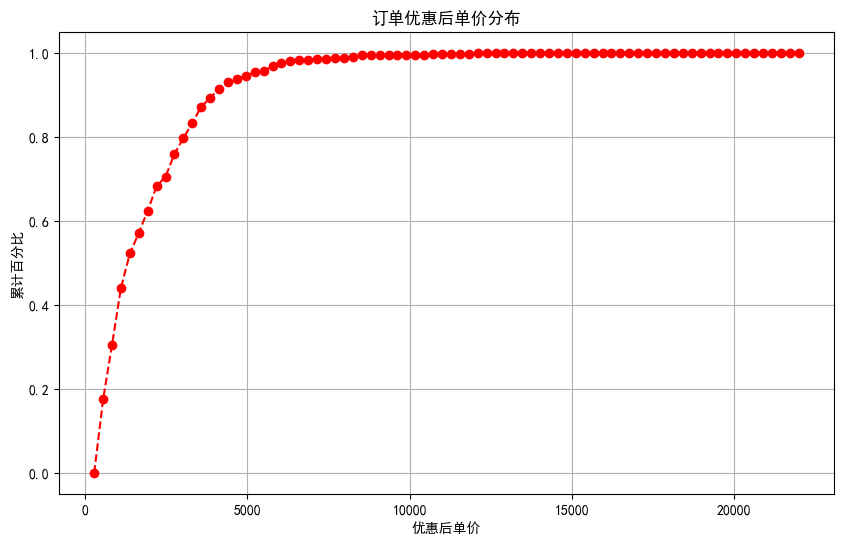

In [10]:
price_series = jd_data['after_prefr_unit_price'] # 提取优惠后单价数据
price_series_num = price_series.count() # 优惠后单价数据数量

hist, bins = np.histogram(price_series, bins=80) # 生成直方图数据
hist_sum = np.cumsum(hist) # 计算累计值
hist_per = hist_sum / price_series_num # 计算累计百分比
bin_edges_plot = np.delete(bins, 0) # 删除第一个元素
# 绘制订单优惠后单价折线图
plt.figure(figsize=(10, 6))
plt.plot(bin_edges_plot, hist_per, color='r', marker='o', linestyle='--')
plt.grid(True)
plt.title('订单优惠后单价分布')
plt.xlabel('优惠后单价')
plt.ylabel('累计百分比')
plt.show()

有效订单按时间趋势分析

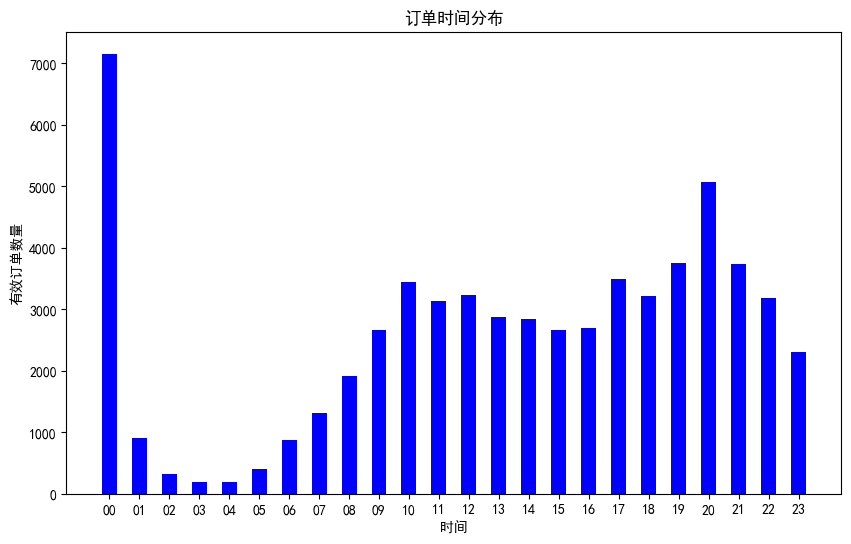

In [11]:
jd_data_cp = jd_data.copy() # 复制数据
jd_data_cp['order_time_hms'] = jd_data_cp['sale_ord_tm'].dt.strftime('%H') # 提取订单时间的小时
pay_time_df = jd_data_cp.groupby('order_time_hms')['sale_ord_id'].count() # 按小时分组统计订单数量

# 绘制订单时间分布柱状图
plt.figure(figsize=(10, 6))
plt.bar(pay_time_df.index, pay_time_df.values, width=0.5, color='b')
plt.title('订单时间分布')
plt.xlabel('时间')
plt.ylabel('有效订单数量')
plt.show()

人均有效订单按照时间趋势分析

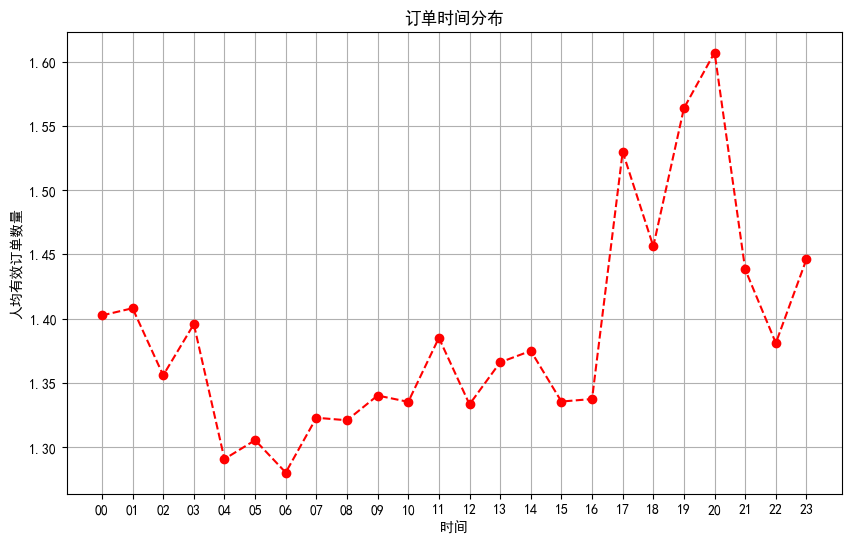

In [12]:
order_time = jd_data_cp.groupby('order_time_hms')['sale_ord_id'].agg({('order_num', 'count')})
user_time = jd_data_cp.groupby('order_time_hms')['user_log_acct'].agg({('user_num', 'nunique')})
order_user_time = pd.merge(order_time, user_time, left_index=True, right_index=True)
order_user_time['order_user_ratio'] = order_user_time['order_num'] / order_user_time['user_num']

plt.figure(figsize=(10, 6))
plt.plot(order_user_time.index, order_user_time['order_user_ratio'], color='r', marker='o', linestyle='--')
plt.grid(True)
plt.title('订单时间分布')
plt.xlabel('时间')
plt.ylabel('人均有效订单数量')
plt.show()

客单价和件单价按时间趋势分析
- 客单价 = 销售额 / 顾客数
- 件单价 = 销售额 / 订单数

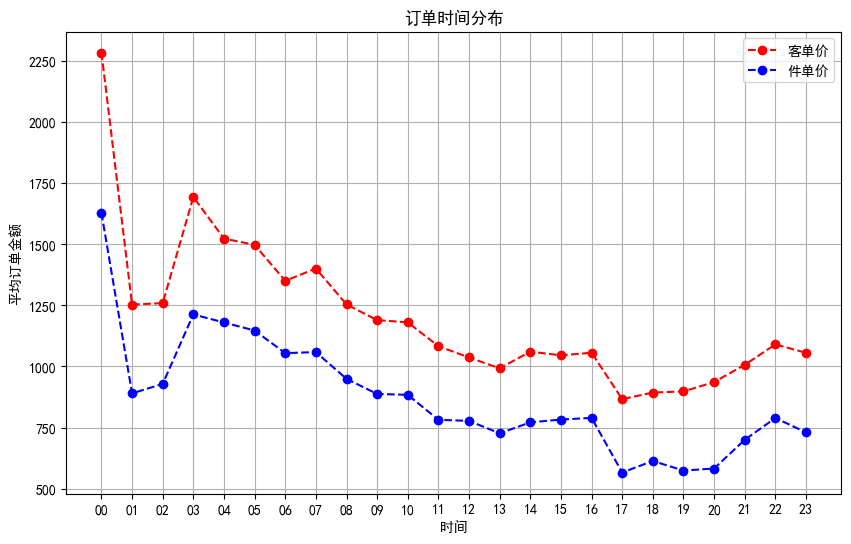

In [13]:
total_pay_time = jd_data_cp.groupby('order_time_hms')['user_actual_pay_amount'].agg({('total_pay', 'sum')}) # 按小时分组统计订单总金额
pay_per_user = total_pay_time['total_pay'] / order_user_time['user_num'] # 计算人均订单金额
pay_per_order = total_pay_time['total_pay']  / order_user_time['order_num'] # 计算订单均金额

plt.figure(figsize=(10, 6))
# 绘制人均订单金额折线图
plt.plot(pay_per_user.index, pay_per_user.values, color='r', marker='o', linestyle='--', label='客单价')
# 绘制订单均金额折线图
plt.plot(pay_per_order.index, pay_per_order.values, color='b', marker='o', linestyle='--', label='件单价')
plt.grid(True)
plt.title('订单时间分布')
plt.xlabel('时间')
plt.ylabel('平均订单金额')
plt.legend()
plt.show()

不同品牌的客单价和件单价分析

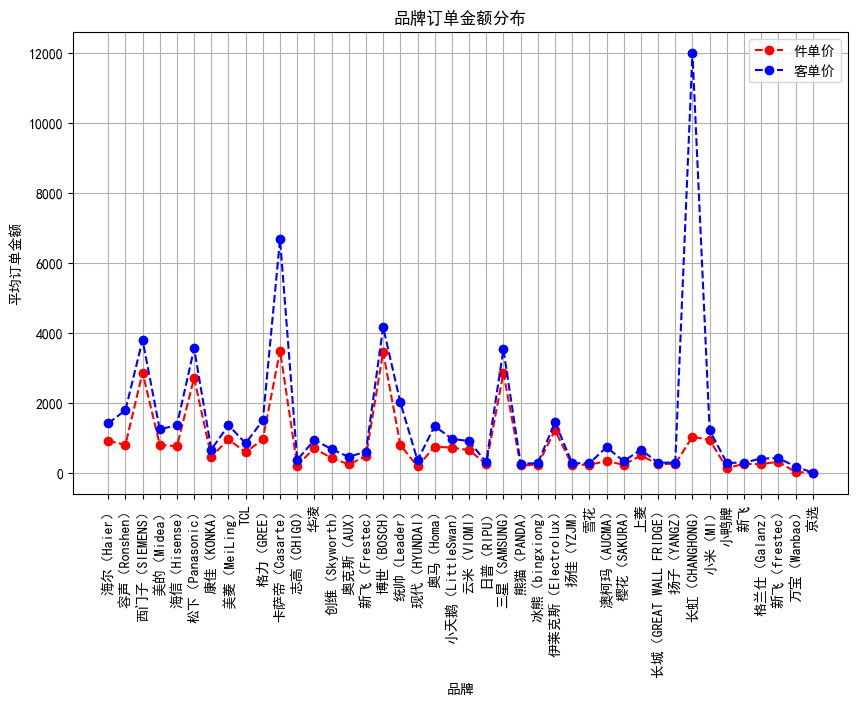

In [76]:
brand = jd_data_cp.groupby('brandname', as_index=False).agg({'user_actual_pay_amount':'sum', 'sale_qtty':'sum', 'user_log_acct':'unique'}).sort_values(by='user_actual_pay_amount', ascending=False)
brand['pay_per_order_brand'] = brand['user_actual_pay_amount'] / brand['sale_qtty'] # 计算品牌订单均金额
brand['pay_per_user_brand'] = brand['user_actual_pay_amount'] / brand['user_log_acct'].apply(lambda x: len(x)) # 计算品牌人均订单金额


plt.figure(figsize=(10, 6))
plt.plot(brand['brandname'], brand['pay_per_order_brand'] , color='r', marker='o', linestyle='--', label='件单价')
plt.plot(brand['brandname'], brand['pay_per_user_brand'], color='b', marker='o', linestyle='--', label='客单价')
plt.grid(True)
plt.title('品牌订单金额分布')
plt.xlabel('品牌')
plt.ylabel('平均订单金额')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [74]:
brand[brand['brandname']=='长虹（CHANGHONG）']

,brandname,user_actual_pay_amount,sale_qtty,user_log_acct,pay_per_order_brand,pay_per_user_brand
40,长虹（CHANGHONG）,36006.0,35,"[兰州B-梁氏, 昆明B-普洱晨光, 北京B-JD荣天电器]",1028.742857,12002.0


In [75]:
jd_data_cp[jd_data_cp['brandname']=='长虹（CHANGHONG）']

,user_log_acct,parent_sale_ord_id,sale_ord_id,sale_ord_tm,sale_ord_dt,item_sku_id,item_name,brandname,sale_qtty,item_first_cate_name,...,user_actual_pay_amount,sale_ord_valid_flag,cancel_flag,check_account_tm,total_offer_amount,self_ord_flag,user_site_city_id,user_site_province_id,user_lv_cd,order_time_hms
10515,兰州B-梁氏,116789959705,116789959705,2020-05-25 11:06:44,2020-05-25,100006079691,长虹（CHANGHONG）208升 三门电冰箱 三门分储 梦幻金玻璃外观 中门软冷冻 节能静...,长虹（CHANGHONG）,30,家用电器,...,31770.0,1,0,2020-05-26 16:58:50,0.0,1,1116,14,90,11
10516,昆明B-普洱晨光,116790872314,116790872314,2020-05-25 08:31:45,2020-05-25,100006079691,长虹(CHANGHONG)208升 三门电冰箱 三门分储 梦幻金玻璃外观 中门软冷冻 节能静...,长虹（CHANGHONG）,1,家用电器,...,0.0,1,0,2020-05-25 08:31:45,0.0,1,1930,22,90,08
10517,北京B-JD荣天电器,116796858971,116796858971,2020-05-25 14:16:21,2020-05-25,100006079691,长虹（CHANGHONG）208升 三门电冰箱 三门分储 梦幻金玻璃外观 中门软冷冻 节能静...,长虹（CHANGHONG）,1,家用电器,...,1059.0,1,0,2020-05-25 14:21:20,0.0,1,1930,22,90,14
10518,北京B-JD荣天电器,116811147230,116811147230,2020-05-25 14:19:35,2020-05-25,100006079691,长虹（CHANGHONG）208升 三门电冰箱 三门分储 梦幻金玻璃外观 中门软冷冻 节能静...,长虹（CHANGHONG）,3,家用电器,...,3177.0,1,0,2020-05-25 14:20:29,0.0,1,1930,22,90,14


- 根据各品牌的客单价和件单价分布，可以看出，长虹（CHANGHONG）品牌的客单价高远高于其他品牌。通过进一步分析发现数据中长虹只有四个客户，但其中兰州B-梁氏的订单量较大，所以导致长虹的客单价较高。

0点和20点价格累计分布

In [14]:
jd_data_0 = jd_data_cp[jd_data_cp.order_time_hms=='00'] # 提取订单时间为00的数据
jd_data_20 = jd_data_cp[jd_data_cp.order_time_hms=='20'] # 提取订单时间为20的数据

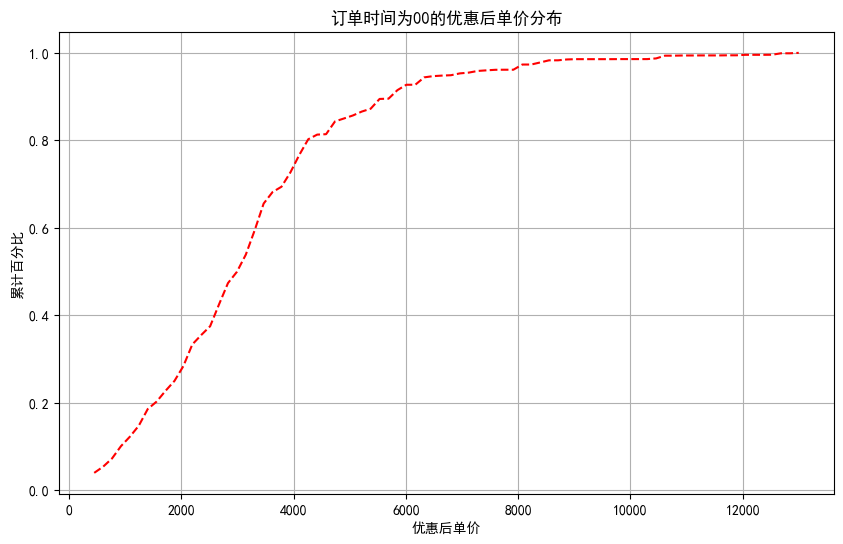

In [15]:
price_series_0 = jd_data_0['after_prefr_unit_price'] # 提取订单时间为00的优惠后单价数据
price_series_0_num = price_series_0.count() # 计算订单时间为00的优惠后单价数据数量
hist, bins = np.histogram(price_series_0, bins=80) # 生成直方图数据
hist_sum = np.cumsum(hist) # 计算累计值
hist_per = hist_sum / price_series_0_num # 计算累计百分比
bin_edges_plot = np.delete(bins, 0) # 删除第一个元素

# 绘制订单时间为00的优惠后单价折线图
plt.figure(figsize=(10, 6))
# 纵坐标为累计百分比，且从0开始
plt.plot(bin_edges_plot, hist_per, color='r', linestyle='--')
plt.grid(True)
plt.title('订单时间为00的优惠后单价分布')
plt.xlabel('优惠后单价')
plt.ylabel('累计百分比')
plt.show()

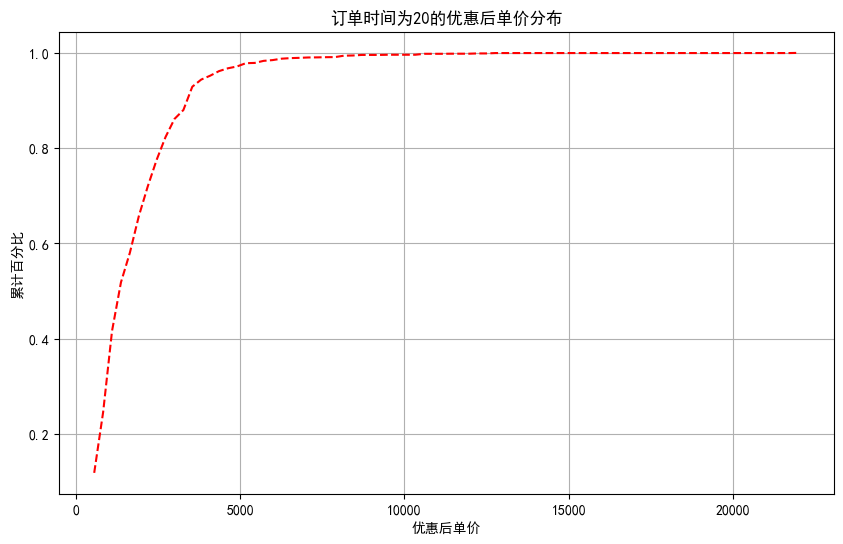

In [16]:
price_series_20 = jd_data_20['after_prefr_unit_price'] # 提取订单时间为20的优惠后单价数据
price_series_20_num = price_series_20.count() # 计算订单时间为20的优惠后单价数据数量
hist, bins = np.histogram(price_series_20, bins=80) # 生成直方图数据
hist_sum = np.cumsum(hist) # 计算累计值
hist_per = hist_sum / price_series_20_num # 计算累计百分比
bin_edges_plot = np.delete(bins, 0) # 删除第一个元素

# 绘制订单时间为20的优惠后单价折线图
plt.figure(figsize=(10, 6))
# 纵坐标为累计百分比，且从0开始
plt.plot(bin_edges_plot, hist_per, color='r', linestyle='--')
plt.grid(True)
plt.title('订单时间为20的优惠后单价分布')
plt.xlabel('优惠后单价')
plt.ylabel('累计百分比')
plt.show()

订单与地区的关系

In [17]:
order_area_temp = jd_data_cp.groupby('user_site_city_id', as_index=False)['sale_ord_id'].agg({'order_num':'count'})
order_area_temp.columns = ['city_id', 'order_num']
order_area = order_area_temp.sort_values(by='order_num', ascending=False)
order_area.city_id = order_area.city_id.astype('int')
city_data = pd.read_csv('./datasets/city_level.csv', encoding='gbk')
order_area_data = pd.merge(order_area, city_data, on='city_id', how='right')
# 删除city_level列缺失值对应行
order_area_data = order_area_data.dropna(subset=['city_level'])
# 将order_num列缺失值填充为0
order_area_data['order_num'] = order_area_data['order_num'].fillna(0)
order_area_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 477
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city_id            474 non-null    int64  
 1   order_num          474 non-null    float64
 2   dim_city_id        474 non-null    int64  
 3   dim_city_name      474 non-null    object 
 4   dim_province_id    474 non-null    int64  
 5   dim_province_name  474 non-null    object 
 6   province_id        474 non-null    int64  
 7   city_level         474 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 33.3+ KB


- 各省份订单量分布

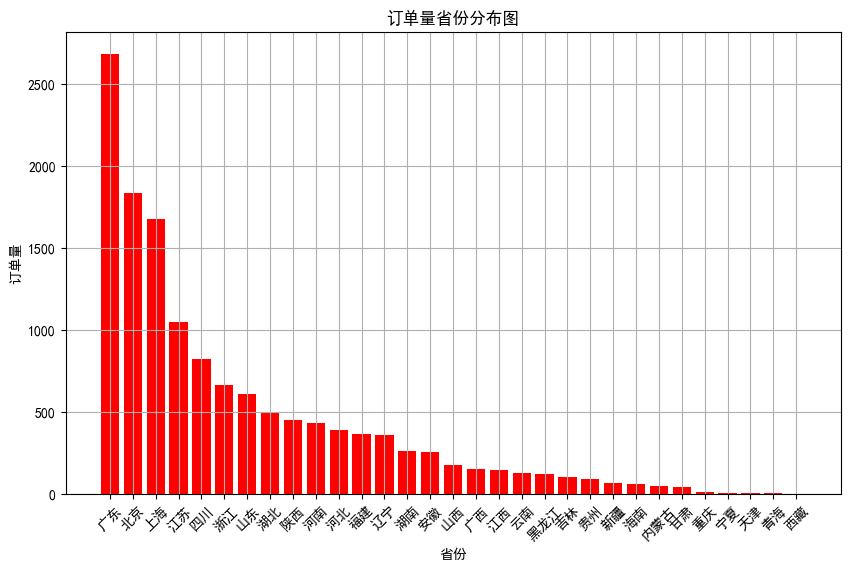

In [18]:
# 绘制订单量省份分布图
order_province = order_area_data.groupby(['dim_province_name'], as_index=False).agg({'order_num':np.sum})
order_province.columns = ['province', 'order_num']
order_province = order_province.sort_values(by='order_num', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(order_province['province'], order_province['order_num'], color='r')
plt.grid(True)
plt.title('订单量省份分布图')
plt.xticks(rotation=45)
plt.xlabel('省份')
plt.ylabel('订单量')
plt.show()

- 订单量前三十的城市

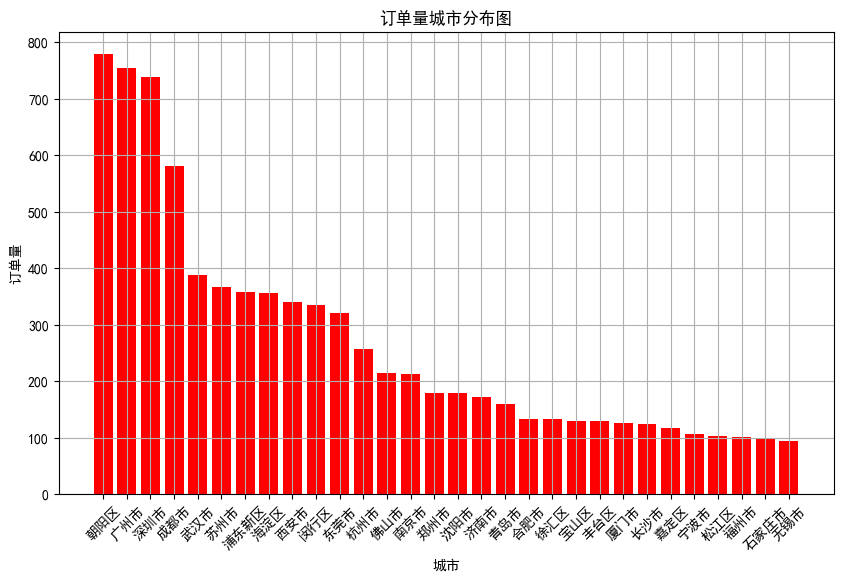

In [25]:
order_city = order_area_data.groupby(['dim_city_name'], as_index=False).agg({'order_num':np.sum})
order_city.columns = ['city', 'order_num']
order_city.sort_values(by='order_num', ascending=False, inplace=True)
order_city = order_city[:30]

plt.figure(figsize=(10, 6))
plt.bar(order_city['city'], order_city['order_num'], color='r')
plt.grid(True)
plt.title('订单量城市分布图')
plt.xticks(rotation=45)
plt.xlabel('城市')
plt.ylabel('订单量')
plt.show()

- 各等级城市订单量分布

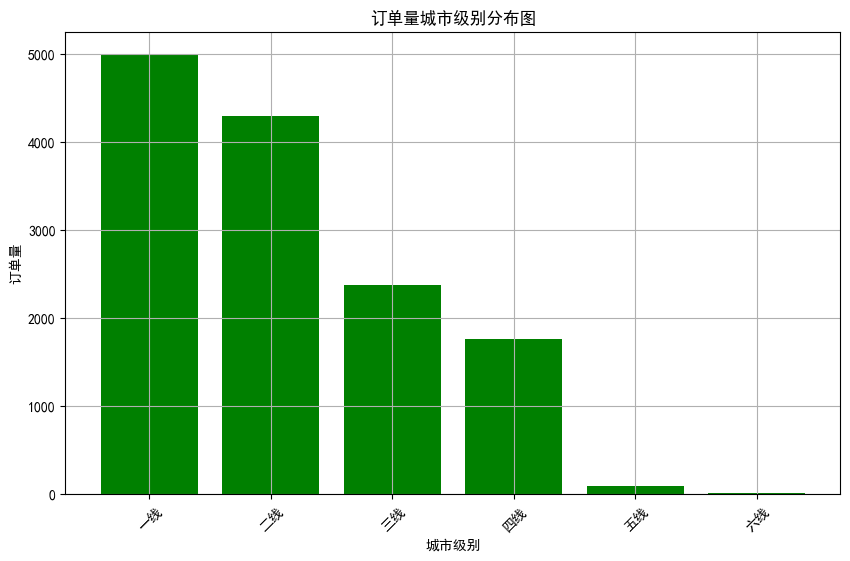

In [33]:
order_level = order_area_data.groupby(['city_level'], as_index=False).agg({'order_num':np.sum})
order_level.columns = ['city_level', 'order_num']
order_level.sort_values(by='order_num', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
plt.bar(order_level['city_level'], order_level['order_num'], color='g')
plt.grid(True)
plt.title('订单量城市级别分布图')
plt.xticks(rotation=45)
plt.xlabel('城市级别')
plt.ylabel('订单量')
plt.show()